### Let's begin, with importing libraries

In [9]:
#pip install mediapipe opencv-python 
import cv2
import numpy as np
import pickle

In [10]:
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils #gives us drawing utilities
mp_pose = mp.solutions.pose #the pose estimation model

### Functions to calculate angles given coordinates of tree joints

In [11]:
def calculate_angle(a,b,c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    radians = np.arctan2(c[1]-b[1],c[0]-b[0]) - np.arctan2(a[1]-b[1],a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return round(angle,2)

In [12]:
def calculate_angle_3D(a,b,c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    return round(np.degrees(angle),3)

### Code to extract required information from video data and then store it in a dataframe

In [13]:
import pandas as pd
list_of_df = []

def captureVideoData(filename):
    #use cv2 to capture the frames from the video and stor it in cap, for a given filename
    cap = cv2.VideoCapture(filename)  

    #create a dataframe for storing values
    df = pd.DataFrame({
        "video_title" : [],
        "timestamps" : [],
        "angle_elbow_right" : [],
        "angle_knee_right" : [],
        "angle_shoulder_right": [],
        "angle_hip_right": []
    })
    #index of df
    i = 0

    #set the pose variable as the mp_pose.Pose object only if the minimum detection and tracking confidence(if person is detected or not) are met
    with mp_pose.Pose(min_detection_confidence=0.7,min_tracking_confidence=0.7) as pose:

        #while video window is being captured/opened
        while cap.isOpened():
            #frames don't exist implies video has ended therefore we break
            #cap.read() returns if frame is detected, and then the frame 
            frame_exists, frame = cap.read()
            
            if frame_exists == True:
                
                #we obtain the width and height of the captured video
                width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

                #we convert the image/frame from BGR to RGB as the pose model requires a frame with RGB values
                image = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
                image.flags.writeable = False

                #now we store the pose object on the image which is writable now and store it in results which will be used below
                results = pose.process(image)

                #we take it back to how it was
                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                try:
                    #index for data frame
                    i = i+1

                    #we obtain all 33 landmarks from the results
                    landmarks = results.pose_landmarks.landmark

                    #we obtain the x,y,z coordinates of the required landmarks
                    shoulder_right = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].z]
                    elbow_right = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].z]
                    wrist_right = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].z]
                    hip_right = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].z]
                    knee_right = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].z]
                    ankle_right = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].z]

                    shoulder_left = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].z]
                    elbow_left = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].z]
                    wrist_left = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].z]
                    hip_left = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].z]
                    knee_left = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].z]
                    ankle_left = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].z]

                    # thumb_right = [landmarks[mp_pose.PoseLandmark.RIGHT_THUMB.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_THUMB.value].y]
                    timestamp = cap.get(cv2.CAP_PROP_POS_MSEC)

                    # we calculate the required angles based on the function
                    # angle_left = calculate_angle_3D(shoulder_left, elbow_left, wrist_left)
                    # angle_right = calculate_angle_3D(shoulder_right, elbow_right, wrist_right)
                    angle_elbow_left = calculate_angle(shoulder_left, elbow_left, wrist_left)
                    angle_elbow_right = calculate_angle(shoulder_right, elbow_right, wrist_right)
                    angle_knee_left = calculate_angle(hip_left, knee_left, ankle_left)
                    angle_knee_right = calculate_angle(hip_right, knee_right, ankle_right)
                    angle_shoulder_right = calculate_angle(hip_right,shoulder_right,elbow_right)
                    angle_shoulder_left = calculate_angle(hip_left,shoulder_left,elbow_left)
                    angle_hip_right = calculate_angle(knee_right,hip_right,shoulder_right)
                    angle_hip_left = calculate_angle(knee_left,hip_left,shoulder_left)

                    #The values are stores in the dataframe
                    df.loc[i] = [filename,timestamp, angle_elbow_right, angle_knee_right, angle_shoulder_right,angle_hip_right]
                                
                    # cv2.putText(image, "Left elbow: "+str(angle_elbow_left),
                    #         tuple(np.multiply(elbow_left[:2], [width,height]).astype(int)),
                    #         cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,255,255), 2, cv2.LINE_AA )

                    #We show the angles on the video feed
                    cv2.putText(image, "Right elbow: "+str(angle_elbow_right),
                            tuple(np.multiply(elbow_right[:2], [width,height]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,255,255), 2, cv2.LINE_AA )
                    
                    # cv2.putText(image, "Left Knee: "+str(angle_knee_left),
                    #         tuple(np.multiply(knee_left[:2], [width,height]).astype(int)),
                    #         cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,255,255), 2, cv2.LINE_AA )
                    cv2.putText(image, "Right Knee: "+str(angle_knee_right),
                            tuple(np.multiply(knee_right[:2], [width,height]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,255,255), 2, cv2.LINE_AA )
                except:
                    #if pose variable is empty, then pass
                    pass

                #draw all the landmarks on the video feed                
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(255,0,0),thickness=2,circle_radius=2),
                    mp_drawing.DrawingSpec(color=(0,255,0),thickness=2,circle_radius=2)
                    )
                
                #we adjust the window size such that the entire video is displayed
                cv2.namedWindow(filename+' feed', cv2.WINDOW_NORMAL)
                cv2.resizeWindow(filename + ' feed', width, height)

                #put the video on the screen
                cv2.imshow(filename+' feed',image)

                #wait for 10msecs after q is pressed then close the window
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
            else:
                break

        #in the end we append each df into a list, at the end we will have the data of each video
        list_of_df.append(df)

    #we release the capturing and destroy the window we put on the screen
    cap.release()
    cv2.destroyAllWindows()

### Run it on every file in the folder

In [14]:
import os

#loop all the videos in the folder and run it through this function
for file in os.listdir('E:\\anaconda'):
  if file.endswith(".mp4"):
    captureVideoData(file)

#### Below is the total number of frames

In [7]:
sum = 0
for df in list_of_df:
    sum = sum + df.shape[0]
print(sum)
    # print(df.head())

657


From these many videos:

In [8]:
len(list_of_df)

18

Let's collect all these dataframes into one final dataframe

In [9]:
#we convert the list of dfs to one big df
final_df = pd.DataFrame({
        "video_title" : [],
        "timestamps" : [],
        "angle_elbow_right" : [],
        "angle_knee_right" : [],
        "angle_shoulder_right": [],
        "angle_hip_right": []
})

for df in list_of_df:
    final_df = pd.concat([df,final_df])

final_df.to_csv('final_df.csv')

# Prediction using the dataframe

In [2]:
import pandas as pd
final_df = pd.read_csv("final_df_with_target.csv")

In [3]:
print(final_df.shape)

(9276, 13)


In [4]:
print(final_df.head())

   Unnamed: 0.1  Unnamed: 0                 video_title  timestamps  \
0             0           1  basketball_video_126_1.mp4    0.000000   
1             1           2  basketball_video_126_1.mp4   33.333333   
2             2           3  basketball_video_126_1.mp4   66.666667   
3             3           4  basketball_video_126_1.mp4  100.000000   
4             4           5  basketball_video_126_1.mp4  133.333333   

   angle_elbow_right  angle_knee_right  angle_shoulder_right  angle_hip_right  \
0             163.88            168.35                 16.88           162.12   
1             162.61            170.29                 16.97           162.09   
2             161.58            171.54                 17.15           161.82   
3             161.80            172.31                 17.84           161.45   
4             161.27            171.82                 18.17           161.17   

   angle_elbow_left  angle_knee_left  angle_shoulder_left  angle_hip_left  \
0        

In [5]:
# from sklearn.preprocessing import MinMaxScaler

# minMax = MinMaxScaler(feature_range=(0,100))
# final_df[['timestamps']] = minMax.fit_transform(final_df[['timestamps']])

In [132]:
# final_df["class"] = final_df.groupby("video_title")["video_title"].transform(
#     lambda x: np.random.choice([0, 1])
# )

In [5]:
final_df.drop(columns=['Unnamed: 0.1'],inplace=True)
final_df.drop(columns=['Unnamed: 0'],inplace=True)

final_df.head(10)

,video_title,timestamps,angle_elbow_right,angle_knee_right,angle_shoulder_right,angle_hip_right,angle_elbow_left,angle_knee_left,angle_shoulder_left,angle_hip_left,target
0,basketball_video_126_1.mp4,0.000000,163.88,168.35,16.88,162.12,146.34,171.63,17.65,174.97,1
1,basketball_video_126_1.mp4,33.333333,162.61,170.29,16.97,162.09,146.01,169.37,17.93,173.66,1
2,basketball_video_126_1.mp4,66.666667,161.58,171.54,17.15,161.82,146.63,168.40,19.15,172.82,1
3,basketball_video_126_1.mp4,100.000000,161.80,172.31,17.84,161.45,146.87,168.09,19.75,172.57,1
4,basketball_video_126_1.mp4,133.333333,161.27,171.82,18.17,161.17,146.19,168.50,19.21,173.38,1
5,basketball_video_126_1.mp4,166.666667,160.25,171.44,18.34,161.22,145.93,168.42,19.58,173.41,1
6,basketball_video_126_1.mp4,200.000000,159.70,170.70,18.48,161.76,145.53,167.63,19.68,173.55,1
7,basketball_video_126_1.mp4,233.333333,159.61,170.07,18.63,162.14,146.93,167.94,20.55,174.08,1
8,basketball_video_126_1.mp4,266.666667,159.41,169.14,18.63,162.45,147.49,168.42,20.80,175.10,1
9,basketball_video_126_1.mp4,300.000000,159.60,167.26,18.91,161.59,148.31,169.11,21.31,175.33,1


In [19]:
final_df['video_title'] = final_df['video_title'].astype('category')
final_df['target'] = final_df['target'].astype('category')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9276 entries, 0 to 9275
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   video_title           9276 non-null   category
 1   timestamps            9276 non-null   float64 
 2   angle_elbow_right     9276 non-null   float64 
 3   angle_knee_right      9276 non-null   float64 
 4   angle_shoulder_right  9276 non-null   float64 
 5   angle_hip_right       9276 non-null   float64 
 6   angle_elbow_left      9276 non-null   float64 
 7   angle_knee_left       9276 non-null   float64 
 8   angle_shoulder_left   9276 non-null   float64 
 9   angle_hip_left        9276 non-null   float64 
 10  target                9276 non-null   category
dtypes: category(2), float64(9)
memory usage: 675.6 KB


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

final_df['video_title'] = le.fit_transform(final_df['video_title'])
final_df['target'] = le.fit_transform(final_df['target'])

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9276 entries, 0 to 9275
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   video_title           9276 non-null   int32  
 1   timestamps            9276 non-null   float64
 2   angle_elbow_right     9276 non-null   float64
 3   angle_knee_right      9276 non-null   float64
 4   angle_shoulder_right  9276 non-null   float64
 5   angle_hip_right       9276 non-null   float64
 6   angle_elbow_left      9276 non-null   float64
 7   angle_knee_left       9276 non-null   float64
 8   angle_shoulder_left   9276 non-null   float64
 9   angle_hip_left        9276 non-null   float64
 10  target                9276 non-null   int64  
dtypes: float64(9), int32(1), int64(1)
memory usage: 761.0 KB


C:\Users\Adithya\AppData\Local\Temp\ipykernel_15312\3269013410.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = final_df.corr()


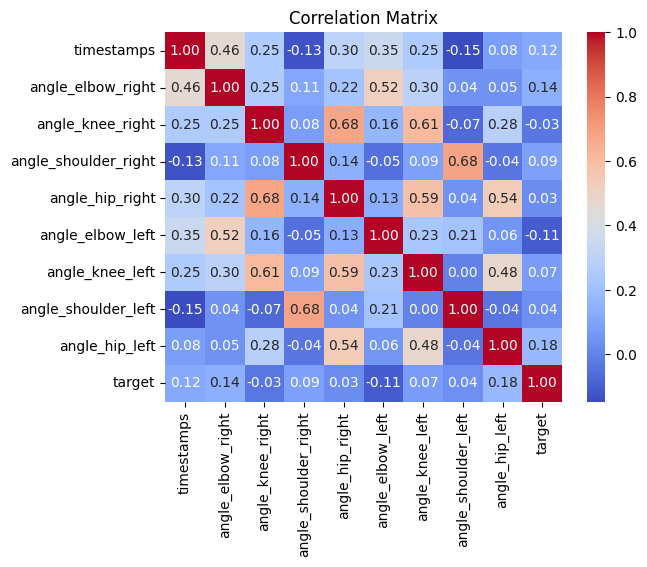

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = final_df.corr()

# Plot correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## To prevent target leak

In [20]:
df_good = final_df[final_df["target"] == 1]
df_bad = final_df[final_df["target"] == 0]

In [23]:
list_of_df_good = []

for group in  df_good.groupby("video_title"):
    list_of_df_good.append(group)

list_of_df_bad = []

for group in  df_bad.groupby("video_title"):
    list_of_df_bad.append(group)

In [25]:
len(list_of_df_good),len(list_of_df_bad)

(71, 55)

Divide them into three sets, have to make sure there's fairly equal number of good and bad videos in each

In [8]:
df_shuffled = final_df.sample(frac=1).reset_index(drop=True)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

train, dev_test = train_test_split(df_shuffled, test_size=0.2, random_state=42)
dev, test = train_test_split(dev_test, test_size=0.5, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,:-1], final_df["class"], test_size=0.2, random_state=42)

In [22]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 8543 to 2132
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   video_title           928 non-null    int32  
 1   timestamps            928 non-null    float64
 2   angle_elbow_right     928 non-null    float64
 3   angle_knee_right      928 non-null    float64
 4   angle_shoulder_right  928 non-null    float64
 5   angle_hip_right       928 non-null    float64
 6   angle_elbow_left      928 non-null    float64
 7   angle_knee_left       928 non-null    float64
 8   angle_shoulder_left   928 non-null    float64
 9   angle_hip_left        928 non-null    float64
 10  target                928 non-null    int64  
dtypes: float64(9), int32(1), int64(1)
memory usage: 83.4 KB


In [23]:
dev.head()

,video_title,timestamps,angle_elbow_right,angle_knee_right,angle_shoulder_right,angle_hip_right,angle_elbow_left,angle_knee_left,angle_shoulder_left,angle_hip_left,target
8543,30,1400.000000,172.81,172.53,162.45,179.39,179.58,176.59,145.14,177.43,1
7017,14,600.000000,91.96,139.67,106.70,156.08,99.88,148.17,91.10,174.26,1
5945,88,233.333333,65.45,173.14,70.94,175.47,91.10,175.39,59.24,179.33,0
513,28,2400.000000,172.33,160.42,12.60,157.97,144.15,155.77,2.08,175.19,1
6497,74,1000.000000,120.31,178.94,67.54,179.16,133.89,178.91,0.39,171.21,0


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=train.shape[1]-1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train.iloc[:,:-1], train["target"], epochs=2, batch_size=32, validation_data=(dev.iloc[:,:-1], dev["target"]))

Epoch 1/2
232/232 [==============================] - 4s 6ms/step - loss: 2.9317 - accuracy: 0.6536 - val_loss: 0.6061 - val_accuracy: 0.7726
Epoch 2/2
232/232 [==============================] - 1s 4ms/step - loss: 0.7433 - accuracy: 0.7191 - val_loss: 0.7797 - val_accuracy: 0.6455


In [25]:
loss, accuracy = model.evaluate(test.iloc[:,:-1], test["target"])
print('Test loss:', loss)
print('Test accuracy:', accuracy)

29/29 [==============================] - 0s 2ms/step - loss: 0.8135 - accuracy: 0.6907
Test loss: 0.8135484457015991
Test accuracy: 0.6907327771186829


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_test_pred_proba = model.predict(test.iloc[:,:-1])
y_test_pred = (y_test_pred_proba > 0.5).astype(int)

acc = accuracy_score(test["target"], y_test_pred)
prec = precision_score(test["target"], y_test_pred)
rec = recall_score(test["target"], y_test_pred)
f1 = f1_score(test["target"], y_test_pred)
conf_mat = confusion_matrix(test["target"], y_test_pred)

# Print performance metrics
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 score:', f1)
print('Confusion matrix:\n', conf_mat)

29/29 [==============================] - 0s 1ms/step
Accuracy: 0.6907327586206896
Precision: 0.8757396449704142
Recall: 0.5471349353049908
F1 score: 0.6734926052332196
Confusion matrix:
 [[345  42]
 [245 296]]


## Saving the model

In [ ]:
import pickle
with open('model_NN_0.pkl', 'wb') as f:
    pickle.dump(model, f)

In [33]:
# with open('model_NN_0.pkl', 'rb') as f:
#     loaded_model_new = pickle.load(f)
from keras.models import load_model
loaded_model = load_model('model_NN_0.h5')

In [34]:
loaded_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                576       
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 16)                528       
                                                                 
 dense_36 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,201
Trainable params: 3,201
Non-trainable params: 0
_________________________________________________________________


In [16]:
dev.iloc[15,:-1]

video_title              42.000000
timestamps              633.333333
angle_elbow_right        51.490000
angle_knee_right        141.580000
angle_shoulder_right     12.960000
angle_hip_right         161.300000
angle_elbow_left         57.710000
angle_knee_left         170.750000
angle_shoulder_left       5.840000
angle_hip_left          179.640000
Name: 4216, dtype: float64

In [17]:
train.iloc[:,:-1]

,video_title,timestamps,angle_elbow_right,angle_knee_right,angle_shoulder_right,angle_hip_right,angle_elbow_left,angle_knee_left,angle_shoulder_left,angle_hip_left
485,31,2466.666667,153.26,176.64,24.60,173.05,149.95,177.96,2.83,173.68
3616,45,266.666667,82.02,167.13,12.49,171.81,92.15,174.39,3.66,176.18
6160,23,700.000000,33.07,145.04,31.58,160.38,52.16,160.10,17.88,174.41
982,101,1000.000000,143.13,142.45,136.77,167.99,78.85,175.17,109.16,177.54
1261,66,333.333333,35.39,176.53,16.10,176.92,50.48,179.74,11.12,174.83
...,...,...,...,...,...,...,...,...,...,...
5734,2,1600.000000,143.89,179.19,141.81,171.70,177.29,175.76,168.45,167.97
5191,52,700.000000,149.37,149.05,129.27,175.96,82.80,150.57,128.43,174.55
5390,105,1633.333333,158.75,173.15,140.94,179.06,67.79,158.54,29.32,178.92
860,5,2100.000000,149.66,163.76,3.92,178.12,149.57,174.93,7.79,179.27


In [64]:
grouped = final_df.groupby("target")
grouped.get_group(final_df['target'].sample().values[0])

,video_title,timestamps,angle_elbow_right,angle_knee_right,angle_shoulder_right,angle_hip_right,angle_elbow_left,angle_knee_left,angle_shoulder_left,angle_hip_left,target
1544,basketball_video_106_0.mp4,0.000000,45.06,159.24,45.24,173.13,41.44,161.53,37.82,156.73,0
1545,basketball_video_106_0.mp4,33.333333,40.79,158.42,39.06,173.10,45.12,164.25,37.88,159.16,0
1546,basketball_video_106_0.mp4,66.666667,40.93,158.21,36.78,173.21,46.90,165.85,37.15,160.81,0
1547,basketball_video_106_0.mp4,100.000000,40.51,157.67,33.00,172.82,47.67,164.87,33.64,161.30,0
1548,basketball_video_106_0.mp4,133.333333,36.41,159.02,27.35,173.29,46.99,163.35,28.36,161.52,0
...,...,...,...,...,...,...,...,...,...,...,...
5257,basketball_video_052_0.mp4,2000.000000,179.36,176.49,20.49,176.86,176.22,173.84,15.91,173.26,0
5258,basketball_video_052_0.mp4,2033.333333,176.32,176.79,17.88,177.33,179.88,174.33,15.54,172.90,0
5259,basketball_video_052_0.mp4,2066.666667,176.04,176.83,14.83,177.28,175.32,174.56,15.44,172.63,0
5260,basketball_video_052_0.mp4,2100.000000,176.30,176.75,12.26,177.47,171.08,174.78,15.14,172.50,0


In [39]:
test.iloc[15:20]

,video_title,timestamps,angle_elbow_right,angle_knee_right,angle_shoulder_right,angle_hip_right,angle_elbow_left,angle_knee_left,angle_shoulder_left,angle_hip_left,target
7929,13,2333.333333,163.16,173.23,14.52,174.50,144.27,174.30,1.62,167.08,1
6215,94,1433.333333,177.75,172.06,14.38,174.28,176.14,174.90,20.33,178.90,0
1569,22,600.000000,91.46,143.01,106.96,158.42,103.94,151.39,93.74,174.87,1
5573,67,566.666667,25.67,170.55,12.88,178.74,42.11,169.84,14.85,179.69,0
5544,21,1433.333333,50.63,159.02,34.17,172.99,28.25,162.57,13.36,177.32,1


In [ ]:
y_pred = model.predict(test.iloc[15:20,:-1])

In [29]:
y_pred

array([[0.3760265 ],
       [0.82722294],
       [0.13363251],
       [0.00715009],
       [0.03599401]], dtype=float32)

In [31]:
i = 20
last_five_frames_df = test.iloc[i-5:i,:-1]
good_video_count = 0
y_pred_frames = model.predict(last_five_frames_df)
for y_pred in y_pred_frames:
    if(y_pred > 0.5):
        good_video_count += 1
if(good_video_count>4):
    print("Good posture")
else:
    print("Bad posture")

1/1 [==============================] - 0s 30ms/step
Bad posture


# Final Rundown 

In [1]:
#pip install mediapipe opencv-python 
import cv2
import numpy as np
import pickle

import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils #gives us drawing utilities
mp_pose = mp.solutions.pose #the pose estimation model

In [2]:
def calculate_angle(a,b,c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    radians = np.arctan2(c[1]-b[1],c[0]-b[0]) - np.arctan2(a[1]-b[1],a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return round(angle,2)

In [1]:
# with open('model_NN_0.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)
from keras.models import load_model

loaded_model = load_model('model_NN_1.h5')

In [3]:
def getCurrentPred(last_five_frames_df):
    good_video_count = 0
    y_pred_frames = loaded_model.predict(last_five_frames_df)
    for y_pred in y_pred_frames:
        if(y_pred > 0.5):
            good_video_count += 1
    if(good_video_count>4):
        return 1
    else:
        return 0

In [4]:
import pandas as pd
import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils #gives us drawing utilities
mp_pose = mp.solutions.pose #the pose estimation model

def captureVideoDataPred(filename):
    #use cv2 to capture the frames from the video and stor it in cap, for a given filename
    if(filename=="0"):
        cap = cv2.VideoCapture(0)
    else:
        cap = cv2.VideoCapture(filename)  

    #create a dataframe for storing values
    df = pd.DataFrame({
        "angle_elbow_right" : [],
        "angle_knee_right" : [],
        "angle_shoulder_right": [],
        "angle_hip_right": [],
        "angle_elbow_left" : [],
        "angle_knee_left" : [],
        "angle_shoulder_left": [],
        "angle_hip_left": []
    })
    #index of df
    i = 0

    #set the pose variable as the mp_pose.Pose object only if the minimum detection and tracking confidence(if person is detected or not) are met
    with mp_pose.Pose(min_detection_confidence=0.7,min_tracking_confidence=0.7) as pose:

        #while video window is being captured/opened
        while cap.isOpened():
            #frames don't exist implies video has ended therefore we break
            #cap.read() returns if frame is detected, and then the frame 
            frame_exists, frame = cap.read()
            
            if frame_exists == True:
                
                #we obtain the width and height of the captured video
                width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

                #we convert the image/frame from BGR to RGB as the pose model requires a frame with RGB values
                image = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
                image.flags.writeable = False

                #now we store the pose object on the image which is writable now and store it in results which will be used below
                results = pose.process(image)

                #we take it back to how it was
                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                try:
                    #index for data frame
                    i = i+1

                    #we obtain all 33 landmarks from the results
                    landmarks = results.pose_landmarks.landmark

                    #we obtain the x,y,z coordinates of the required landmarks
                    shoulder_right = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].z]
                    elbow_right = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].z]
                    wrist_right = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].z]
                    hip_right = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].z]
                    knee_right = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].z]
                    ankle_right = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].z]

                    shoulder_left = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].z]
                    elbow_left = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].z]
                    wrist_left = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].z]
                    hip_left = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].z]
                    knee_left = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].z]
                    ankle_left = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].z]

                    # thumb_right = [landmarks[mp_pose.PoseLandmark.RIGHT_THUMB.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_THUMB.value].y]
                    # timestamp = cap.get(cv2.CAP_PROP_POS_MSEC)

                    # we calculate the required angles based on the function
                    # angle_left = calculate_angle_3D(shoulder_left, elbow_left, wrist_left)
                    # angle_right = calculate_angle_3D(shoulder_right, elbow_right, wrist_right)
                    angle_elbow_left = calculate_angle(shoulder_left, elbow_left, wrist_left)
                    angle_elbow_right = calculate_angle(shoulder_right, elbow_right, wrist_right)
                    angle_knee_left = calculate_angle(hip_left, knee_left, ankle_left)
                    angle_knee_right = calculate_angle(hip_right, knee_right, ankle_right)
                    angle_shoulder_right = calculate_angle(hip_right,shoulder_right,elbow_right)
                    angle_shoulder_left = calculate_angle(hip_left,shoulder_left,elbow_left)
                    angle_hip_right = calculate_angle(knee_right,hip_right,shoulder_right)
                    angle_hip_left = calculate_angle(knee_left,hip_left,shoulder_left)

                    #The values are stores in the dataframe
                    df.loc[i] = [angle_elbow_right, angle_knee_right, angle_shoulder_right,angle_hip_right,angle_elbow_left,angle_knee_left,angle_shoulder_left,angle_hip_left]
                    #print(df.loc[i-5:i])
                    if(i>=5):
                        current_frame_pred = getCurrentPred(df.loc[i-5:i])
                        if(current_frame_pred==0):
                            cv2.putText(image, "Bad posture",
                                tuple(np.multiply(elbow_right[:2], [width,height]).astype(int)),
                                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,0,255), 2, cv2.LINE_AA )
                        else:
                            cv2.putText(image, "Good posture",
                                tuple(np.multiply(elbow_right[:2], [width,height]).astype(int)),
                                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,0), 2, cv2.LINE_AA )
                    
                    # cv2.putText(image, "Left elbow: "+str(angle_elbow_left),
                    #         tuple(np.multiply(elbow_left[:2], [width,height]).astype(int)),
                    #         cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,255,255), 2, cv2.LINE_AA )

                    # #We show the angles on the video feed
                    # cv2.putText(image, "Right elbow: "+str(angle_elbow_right),
                    #         tuple(np.multiply(elbow_right[:2], [width,height]).astype(int)),
                    #         cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,255,255), 2, cv2.LINE_AA )
                    
                    # # cv2.putText(image, "Left Knee: "+str(angle_knee_left),
                    # #         tuple(np.multiply(knee_left[:2], [width,height]).astype(int)),
                    # #         cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,255,255), 2, cv2.LINE_AA )
                    # cv2.putText(image, "Right Knee: "+str(angle_knee_right),
                    #         tuple(np.multiply(knee_right[:2], [width,height]).astype(int)),
                    #         cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,255,255), 2, cv2.LINE_AA )
                except:
                    #if pose variable is empty, then pass
                    print("No pose variable: Could be due to unfamiliar camera angle/unclear recording")
                    pass
                

                #draw all the landmarks on the video feed                
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(255,0,0),thickness=2,circle_radius=2),
                    mp_drawing.DrawingSpec(color=(0,255,0),thickness=2,circle_radius=2)
                    )
                
                #we adjust the window size such that the entire video is displayed
                cv2.namedWindow(filename+' feed', cv2.WINDOW_NORMAL)
                cv2.resizeWindow(filename + ' feed', width, height)

                #put the video on the screen
                cv2.imshow(filename+' feed',image)

                #wait for 10msecs after q is pressed then close the window
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
            else:
                print("Frame doesn't exist")
                break


    #we release the capturing and destroy the window we put on the screen
    cap.release()
    cv2.destroyAllWindows()

In [7]:
filename = "0"
# filename = "\\basketball_video_063_0.mp4"
# filename = "\\basketball_video_037_1.mp4"

captureVideoDataPred(filename)

1/1 [==============================] - 0s 34ms/step
